# Description

The aim of this group work is to use machine learning to create a model predicting which passengers survived the Titanic shipwreck. The data used is from [Kaggle Titanic ML Competition](https://www.kaggle.com/competitions/titanic), and Kaggle is used to evaluate our models as well. There is also additional tasks which are completed during this group work.

# Imports and definitions

In [89]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [90]:
DATA_PATH = os.path.join("data")

In [91]:
def load_csv_data(data_directory, csv_filename):
    '''Read csv data from data_directory/csv_filename'''
    csv_path = os.path.join(data_directory, csv_filename)
    return pd.read_csv(csv_path)

# Loading data and taking a look

In [92]:
train = load_csv_data(DATA_PATH, "train.csv")
test = load_csv_data(DATA_PATH, "test.csv")

In [93]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [94]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [95]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [96]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [97]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# Describing data

Basic describe with mean, min etc.

In [98]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Interestingly largely passangers were quite young on the Titanic. Many were also travelling without siblings or parents/children. Unfortunately we can also see that most of the passangers did not survive. Let's look at the distribution of data in different columns next using histograms.

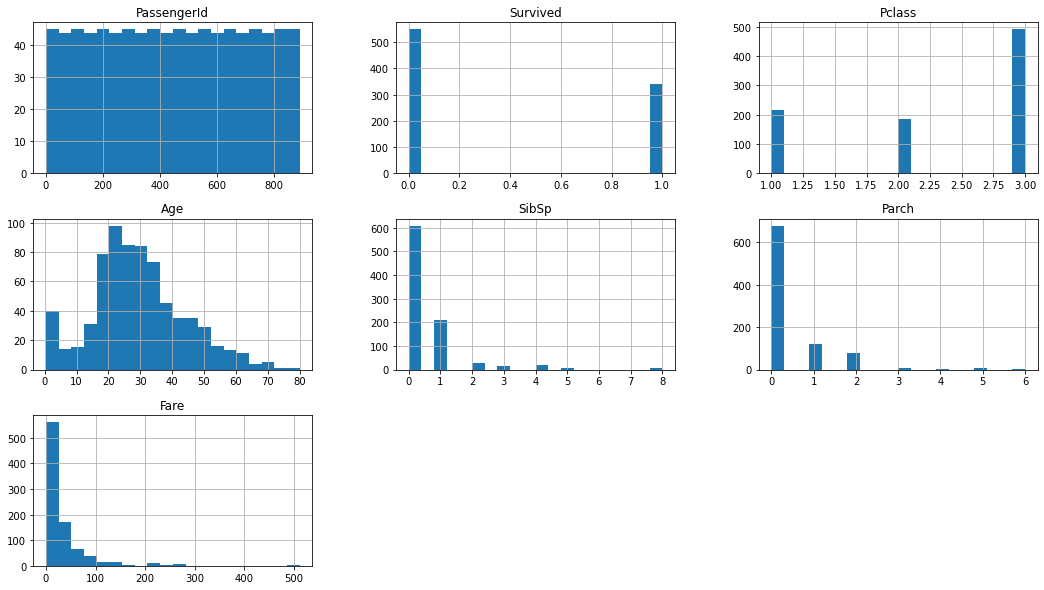

In [99]:
train.hist(bins=20, figsize=(18,10));

Again we can see that there were many fairly young people. It could be interesting to see, how the distribution of age between passangers who survived and who did not.

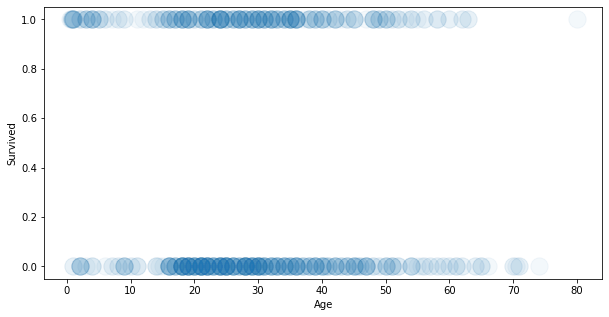

In [100]:
train.plot(kind="scatter", x="Age", y="Survived", alpha=0.05, s=300, figsize=(10,5));

The youngsters might have been slightly more nimble to run towards the lifeboats, but you cannot see any strong signs of correlation.

Could you though buy yourself a survival?

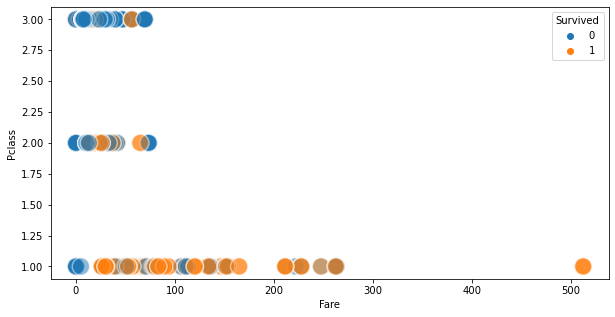

In [101]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=train, x="Fare", y="Pclass", hue="Survived", s=300, alpha=0.5);

Maybe? It certainly looks like passangers in the first class had more survivors (orange colour) among them. Data points representing passangers in the third class do look very blue.

Lets properly calculate and visualise the Pearsons correlation coefficiency.

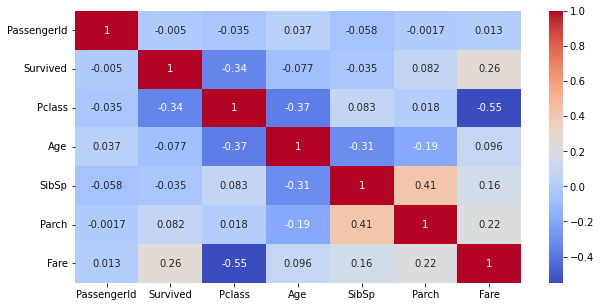

In [102]:
plt.figure(figsize=(10,5))
sns.heatmap(train.corr(method="pearson"), annot=True, cmap="coolwarm");

Here cooler colours represent negative correlation and more warm colours represent positive correlation. Now we can see that being in higher class (lower numerical value), and also higher fare correlates pretty substantially with survival.

# Preparing data

## Building pipelines

For numeric columns we built a pipeline which replaces missing values with mean value for that column, and scales all the values with `StandardScaler`.

In [103]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="mean")),
    ('std_scaler', StandardScaler()),
])

Non-numeric columns can't be prepared with the pipeline above, therefore we built a special pipeline for handling them. The pipeline first replaces missing data with most frequent data, then encoding non-binary categories with `OneHotEncoder`.

In [104]:
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('onehotenc', OneHotEncoder()),
])

## Selecting data and running pipelines

There were a few columns we decided to drop entirely, based on their perceived unusability. Dropped columns are:

- Cabin (a lot of data missing)
- Ticket (doesn't seem meaningful for us)
- Name (we at least hope that name is not a significant factor on survival)

This leaves us with numeric columns of:

- Age
- Number of siblings (*SibSp*)
- Number of parents (*Parch*)
- Fare

And category columns of:

- Ticket class (*Pclass*) (this is a category with possible classes: 1, 2 and 3)
- Sex
- Embarked (the port of embarkation)

In [105]:
num_attribs = ["Age", "SibSp", "Parch", "Fare"]
cat_attribs = ["Pclass", "Sex", "Embarked"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

train_prepared = full_pipeline.fit_transform(train)
test_prepared = full_pipeline.fit_transform(test)

Let's take a look...

In [106]:
train_prepared[0]

array([-0.5924806 ,  0.43279337, -0.47367361, -0.50244517,  0.        ,
        0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  1.        ])

In [107]:
test_prepared[0]

array([ 0.3349926 , -0.49947002, -0.4002477 , -0.49840706,  0.        ,
        0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
        1.        ,  0.        ])

Seems OK.

# Random Forest

Using Random Forest as our first machine learning model.

Creating labels for the data. Naming them as rf_ indicating that the usage is for Random Forest. 

In [108]:
rf_labels = train['Survived']
rf_labels

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

Splitting the data into training and test sets to evaluate our model.

In [109]:
rf_features_train, rf_features_test, rf_labels_train, rf_labels_test = train_test_split(train_prepared, rf_labels, test_size=0.25, random_state = 0)

# Checking the shape
print('Training Features Shape:', rf_features_train.shape)
print('Training Labels Shape:', rf_labels_train.shape)
print('Testing Features Shape:', rf_features_test.shape)
print('Testing Labels Shape:', rf_labels_test.shape)

Training Features Shape: (668, 12)
Training Labels Shape: (668,)
Testing Features Shape: (223, 12)
Testing Labels Shape: (223,)


Next instantiating the model with 100 decision trees. 

In [110]:
rf = RandomForestClassifier(random_state=42)

Then training the model with training data.

In [111]:
rf.fit(rf_features_train, rf_labels_train)

RandomForestClassifier(random_state=42)

Next we are using predict method on the test data.

In [112]:
rf_predictions_test = rf.predict(rf_features_test)
rf_predictions_test

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1])

Lastly checking the accuracy score.

In [113]:
accuracy_score(rf_labels_test, rf_predictions_test)

0.8385650224215246

The classification score for Random Forest is ok, but could be better. 

# Neural Network as an alternative

We selected MultiLayer Perceptron as our second machine learning model.

First we need to get labels for the data. We will also name the variable `alt_*` to keep them specific to this "alternative model".

In [114]:
alt_labels = train['Survived']
# Let's also take a look just to be sure
alt_labels

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

And split the data in to training and test sets so we can actually evaluate our model. Remember the original "test" data doesn't contain the Survived column, which means we can't use it in actual evaluation. It's for when we want to train and predict the best of our models for Kaggle competition.

In [115]:
alt_features_train, alt_features_test, alt_labels_train, alt_labels_test = train_test_split(train_prepared, alt_labels, test_size=0.25, random_state = 0)
alt_features_train

array([[-0.1307545 , -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       [-0.97725235,  3.15480905,  2.00893337, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.02315421,  0.43279337, -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.        , -0.4745452 , -0.47367361, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.48488031,  0.43279337, -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       [ 2.33178473,  0.43279337,  0.76762988, ...,  0.        ,
         0.        ,  1.        ]])

Seems good. Let's next instantiate the perceptron with just the default values, just to see what happens.

In [116]:
mlp = MLPClassifier(random_state=42)

And let's try to fit the model...

In [117]:
mlp.fit(alt_features_train, alt_labels_train)

/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42)

That didn't go as expected. We probably need to increase maximum iteration count significantly. Let's try 2000 (the default was 200).

In [118]:
mlp = MLPClassifier(max_iter=2000, random_state=42)
mlp.fit(alt_features_train, alt_labels_train)

MLPClassifier(max_iter=2000, random_state=42)

Yay, it converged! Let's try to predict without tuning anything more. Again just to see what happens.

In [119]:
alt_predictions_test = mlp.predict(alt_features_test)
alt_predictions_test

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0])

And let's evaluate the results with a confusion matrix and classification score.

In [120]:
confusion_matrix(alt_labels_test, alt_predictions_test)

array([[125,  14],
       [ 30,  54]])

In [121]:
accuracy_score(alt_labels_test, alt_predictions_test)

0.8026905829596412

Not that good of an accuracy. That's expected though knowing our neural network consists of just one level of 200 hidden neurons.

# Selecting one of the models for finer tuning

In [122]:
rf_predictions_train = rf.predict(rf_features_train)
alt_predictions_train = clf.predict(alt_features_train)

rf_train_accuracy = accuracy_score(rf_labels_train, rf_predictions_train)
rf_test_accuracy = accuracy_score(rf_labels_test, rf_predictions_test)
alt_train_accuracy = accuracy_score(alt_labels_train, alt_predictions_train)
alt_test_accuracy = accuracy_score(alt_labels_test, alt_predictions_test)

print(f'Random Forest accuracies: training {rf_train_accuracy}, test {rf_test_accuracy}')
print(f'Multi-Layer Perceptron (our alternative) accuracies: training {alt_train_accuracy}, test {alt_test_accuracy}')

Random Forest accuracies: training 0.9805389221556886, test 0.8385650224215246
Multi-Layer Perceptron (our alternative) accuracies: training 0.8847305389221557, test 0.8026905829596412


In [123]:
rf_train_precision = precision_score(rf_labels_train, rf_predictions_train)
rf_test_precision = precision_score(rf_labels_test, rf_predictions_test)
alt_train_precision = precision_score(alt_labels_train, alt_predictions_train)
alt_test_precision = precision_score(alt_labels_test, alt_predictions_test)

print(f'Random Forest precisions: training {rf_train_precision}, test {rf_test_precision}')
print(f'Multi-Layer Perceptron (our alternative) precisions: training {alt_train_precision}, test {alt_test_precision}')

Random Forest precisions: training 0.9880478087649402, test 0.8157894736842105
Multi-Layer Perceptron (our alternative) precisions: training 0.91324200913242, test 0.7941176470588235


In [124]:
rf_train_recall = recall_score(rf_labels_train, rf_predictions_train)
rf_test_recall = recall_score(rf_labels_test, rf_predictions_test)
alt_train_recall = recall_score(alt_labels_train, alt_predictions_train)
alt_test_recall = recall_score(alt_labels_test, alt_predictions_test)

print(f'Random Forest recalls: training {rf_train_recall}, test {rf_test_recall}')
print(f'Multi-Layer Perceptron (our alternative) recalls: training {alt_train_recall}, test {alt_test_recall}')

Random Forest recalls: training 0.9612403100775194, test 0.7380952380952381
Multi-Layer Perceptron (our alternative) recalls: training 0.7751937984496124, test 0.6428571428571429


In [127]:
rf_scores = cross_val_score(rf, rf_features_train, rf_labels_train, cv=10)
rf_scores.mean()

0.799502487562189

In [129]:
alt_scores = cross_val_score(mlp, alt_features_train, alt_labels_train, cv=10)
alt_scores.mean()

0.811420171867933

The mean for our alternative model (MLPClassifier) seems to be a bit higher. Let's select that for further fine-tuning.

# Fine-tuning the selected model

# Cross-validating the fine tuned model

# Making predictions

# How well did it all work out?